# Machine Learning
Utilizando um conjunto de dados gerado para simular registros de partículas gama de alta energia em um telescopio atmosférico Cherenkov. [informação do conjunto de dados](https://archive.ics.uci.edu/dataset/159/magic+gamma+telescope)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [2]:
cols = ['flength','fwidth','fsize','fconc','fconc1','fasym','fm3long','fm3trans','falpha','fdist','class']
df = pd.read_csv('magic04.data',names=cols)
df.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [3]:
df["class"].unique()  # para ver quantos tipos de classes tem

array(['g', 'h'], dtype=object)

In [4]:
df["class"] = (df["class"] == 'g').astype(int)  # converte as classes em números

In [5]:
df.head()

,flength,fwidth,fsize,fconc,fconc1,fasym,fm3long,fm3trans,falpha,fdist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


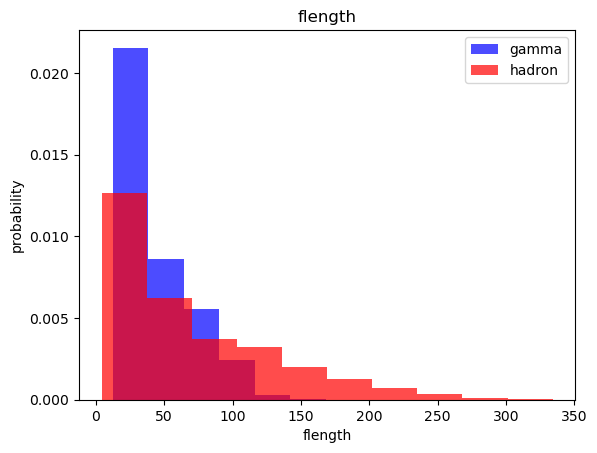

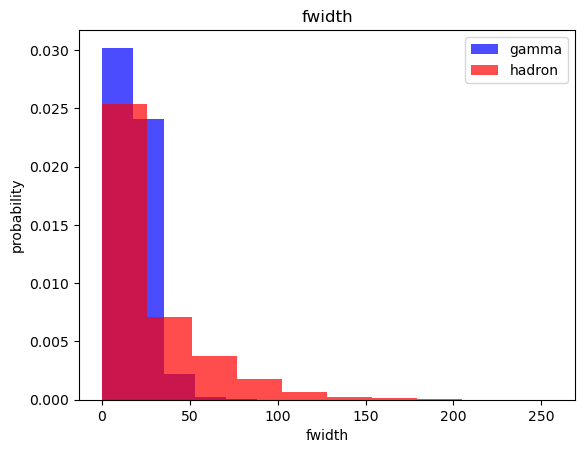

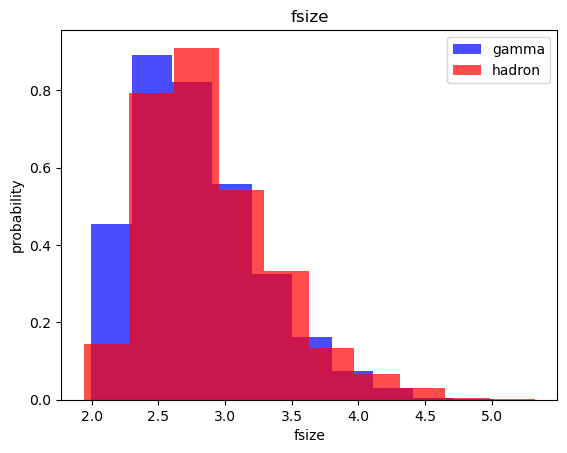

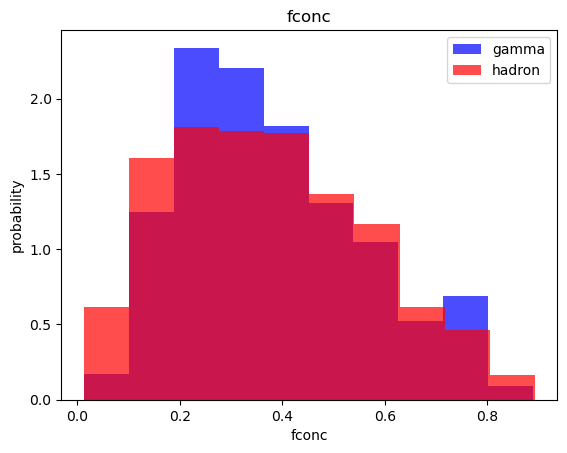

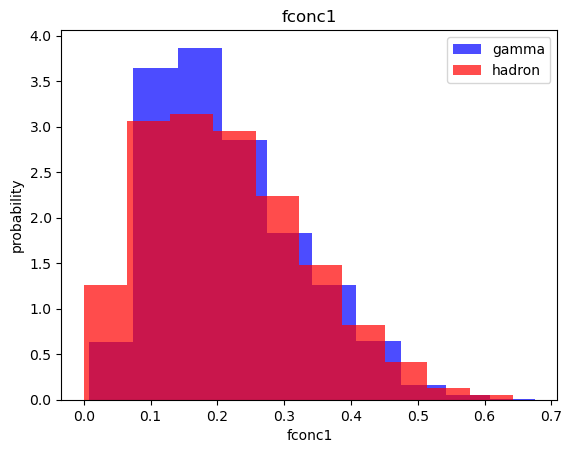

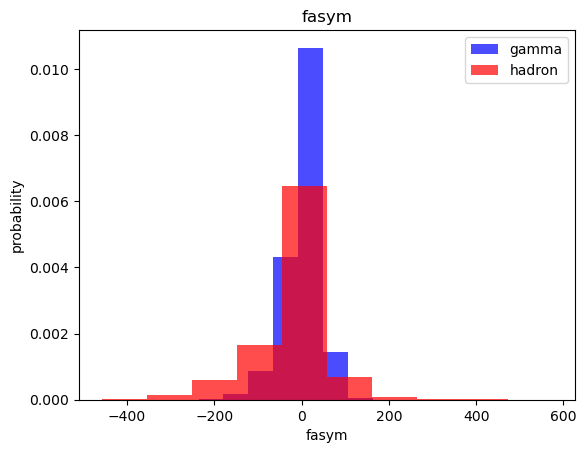

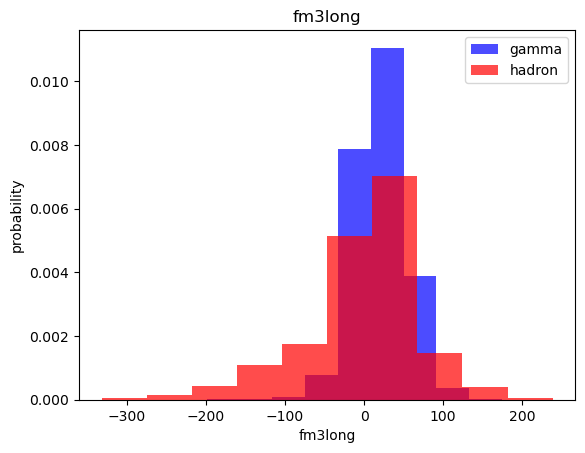

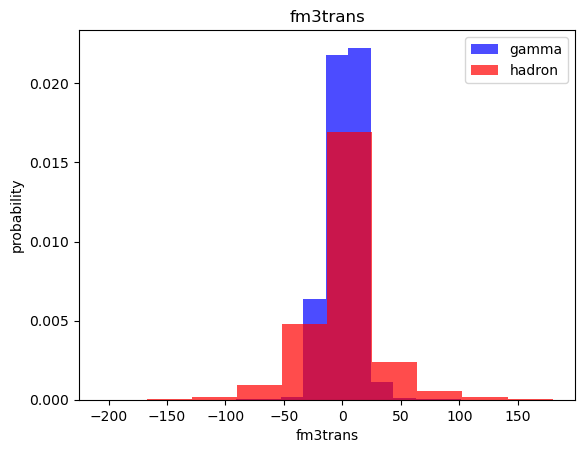

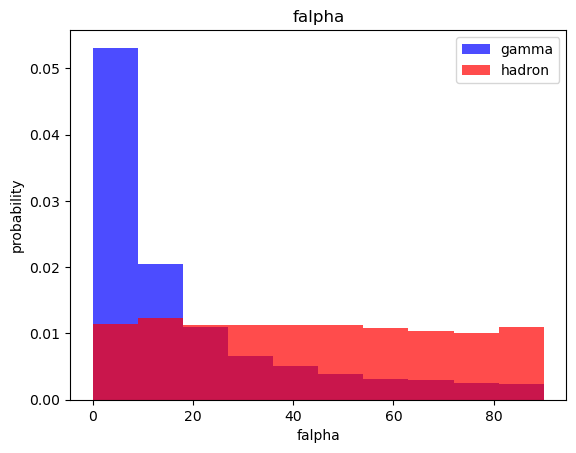

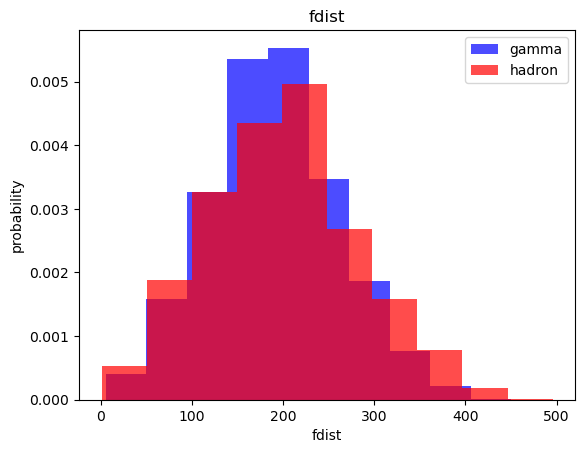

In [6]:
for label in cols[:-1]:
    plt.hist(df[df["class"] == 1][label],color="blue", label="gamma",alpha=0.7, density=True)
    plt.hist(df[df["class"] == 0][label],color="red", label="hadron",alpha=0.7,density=True)
    plt.title(label)
    plt.ylabel("probability")
    plt.xlabel(label)
    plt.legend()
    plt.show()

# Treinamento, validação, teste de conjunto de dados

In [7]:
def scale_dataset(dataframe, oversample=False):
    X = dataframe[dataframe.columns[:-1]].values
    y = dataframe[dataframe.columns[-1]].values

    scaler = StandardScaler()
    X = scaler.fit_transform(X)
    if oversample:
        ros = RandomOverSampler()
        X,y = ros.fit_resample(X,y)

    data = np.hstack((X,np.reshape(y,(-1,1) )))
    return data, X,y

In [15]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

/home/io/anaconda3/envs/notebook/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [9]:
print(len(train[train["class"]==1])) # gamma
print(len(train[train["class"]==0])) # gamma

7399
4013


In [10]:
train, X_train, y_train = scale_dataset(train, oversample=True)

In [11]:
len(y_train)

14798

In [12]:
sum(y_train==1)

7399

In [13]:
sum(y_train==0)

7399

In [ ]:
train, valid, test = np.split(df.sample(frac=1),[int(0.6*len(df)),int(0.8*len(df))])

In [16]:
train, X_train, y_train = scale_dataset(train,oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

## K-nearest neighbors

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [18]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [19]:
y_pred = knn_model.predict(X_test)

In [20]:
y_pred

array([0, 0, 0, ..., 1, 1, 0])

In [21]:
y_test

array([1, 0, 1, ..., 0, 1, 0])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.74      0.75      1344
           1       0.86      0.87      0.86      2460

    accuracy                           0.82      3804
   macro avg       0.81      0.80      0.80      3804
weighted avg       0.82      0.82      0.82      3804



## Naive Bayes

[Wikipedia](https://en.wikipedia.org/wiki/Naive_Bayes_classifier)


Em termos abstractos, o modelo de Naive Bayes é um modelo de probabilidade condicional: atribui probabilidades $p(C_k| x_1,...x_n)$ a cada um dos K resultados ou classes  $C_k$ possíveis para classificar uma instância de um problema, representada por um vetor $x=(x_1,...x_n)$ que codifica cerca de n características (variáveis independentes). O problema com a formulação acima é que, se o número de características n for grande ou se uma caraterística puder assumir um grande número de valores, então basear um modelo deste tipo em tabelas de probabilidades é inviável. O modelo deve, por conseguinte, ser reformulado para o tornar mais fácil de gerir. 


$$p(C_k|x)=\frac{p(C_k) p(x|C_k)}{p(x)}$$
Em outras palavras:
$$\text{posteriores }= \frac{\text{prioridade}\times \text{ probabilidade}}{\text{evidencia}}$$

$$P(C_k(x_1,x_2,...x_n)) \alpha P(C_k)\prod^n_{i=1} P(x_i|C_k)$$

$$ŷ = \text{argmax } P(C_k|x_1,x_2,...x_n); k \in \{1,k\}$$

MAP = **Maximum A posteriori**

$*\alpha$(proporcional a)

In [23]:
from sklearn.naive_bayes import GaussianNB

In [24]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [25]:
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.68      0.41      0.51      1344
           1       0.74      0.89      0.81      2460

    accuracy                           0.72      3804
   macro avg       0.71      0.65      0.66      3804
weighted avg       0.71      0.72      0.70      3804



## Regressão Logistica

Algoritmo de aprendizagem automática supervisionado, amplamente utilizado em tarefas de **classificação binária**, como identificar se uma mensagem de correio eletrónico é ou não spam e diagnosticar doenças, avaliando a presença ou ausência de condições específicas com base nos resultados dos testes dos pacientes. Esta abordagem utiliza a função logística (ou sigmoide) para transformar uma combinação linear de características de entrada num valor de probabilidade que varia entre 1 e 0.


$$\frac{p}{1-p}=mx+b$$
$$\ln\bigg(\frac{p}{1-p}\bigg)=mx+b$$

$$e^{\ln\bigg(\frac{p}{1-p}\bigg)}=e^{mx+b}$$

$$\frac{p}{1-p}=e^{mx+b}$$

$$p=e^{mx+b}-pe^{mx+b}$$

$$p=\frac{e^{mx+b}}{1+e^{mx+b}}$$

$$p=\frac{e^{mx+b}}{1+e^{mx+b}}\times \frac{e^{-(mx+b)}}{e^{-(mx+b)}}$$

$$p= \frac{1}{e^{-(mx+b)}} = S(mx+b)$$

$$S(y)=\frac{1}{1+e^{-y}}$$

In [26]:
from sklearn.linear_model import LogisticRegression

In [27]:
log_model = LogisticRegression()
log_model = log_model.fit(X_train, y_train)

In [28]:
y_pred = log_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.73      0.72      1344
           1       0.85      0.83      0.84      2460

    accuracy                           0.79      3804
   macro avg       0.77      0.78      0.78      3804
weighted avg       0.80      0.79      0.80      3804



## Support Vector Machines (SVM)

In [29]:
from sklearn.svm import SVC

In [30]:
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)

In [31]:
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81      1344
           1       0.89      0.90      0.90      2460

    accuracy                           0.86      3804
   macro avg       0.85      0.85      0.85      3804
weighted avg       0.86      0.86      0.86      3804



**Activation Function**


Sigmoid
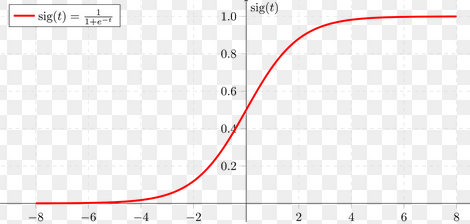

Tanh
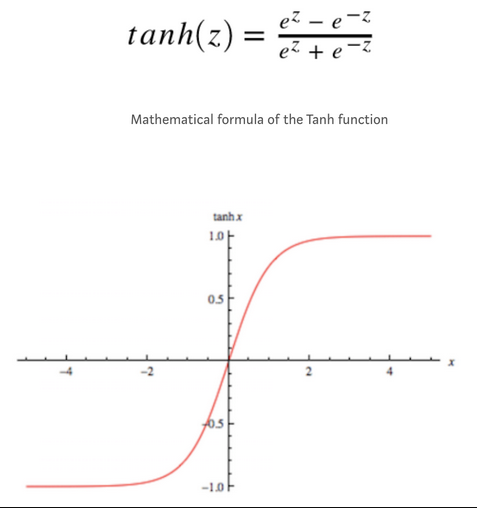


RELU
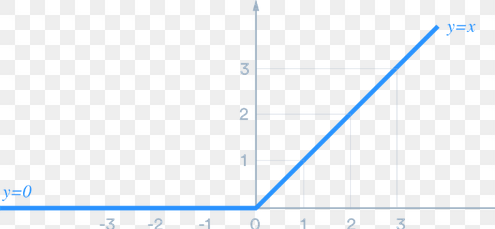

## Bibliotecas

### Modelo
- Tensorflow

## Neural net

In [33]:
import tensorflow as tf

In [41]:
def train_model(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
    nn_model = tf.keras.Sequential([
        tf.keras.layers.Dense(num_nodes, activation="relu", input_shape=(10,)),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(num_nodes, activation="relu"),
        tf.keras.layers.Dropout(dropout_prob),
        tf.keras.layers.Dense(1, activation="sigmoid")
    ])

    nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss="binary_crossentropy",
                metrics=["accuracy"])
    history = nn_model.fit(
        X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0
    )
    return nn_model, history

In [42]:
def plot_history(history):
    fig,(ax1,ax2) = plt.subplots(1,2, figsize=(12,6))
    ax1.plot(history.history["loss"], label="loss")
    ax1.plot(history.history["val_loss"], label="val_loss")
    ax1.set_xlabel("Epoch")
    ax1.set_ylabel("Binary crossentropy")
    ax1.grid(True)
    ax1.legend()
    
    ax2.plot(history.history["accuracy"], label="accuracy")
    ax2.plot(history.history["val_accuracy"], label="val_accuracy")
    ax2.set_xlabel("Epoch")
    ax2.set_ylabel("Accuracy")
    ax2.grid(True)
    ax2.legend()
    
    plt.show()

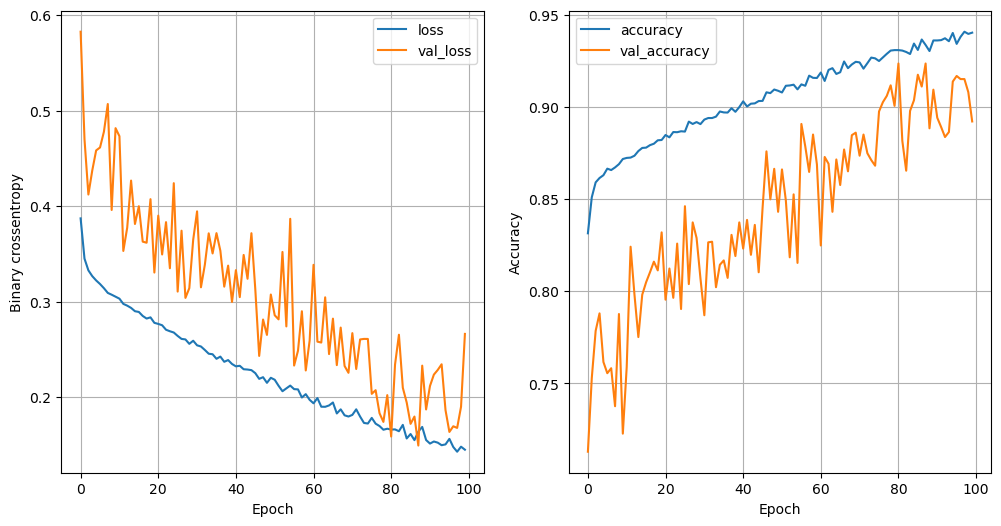

In [43]:
plot_history(history)

64nodes, dropout 0, learning rate 0.01,batchbatch_size 32


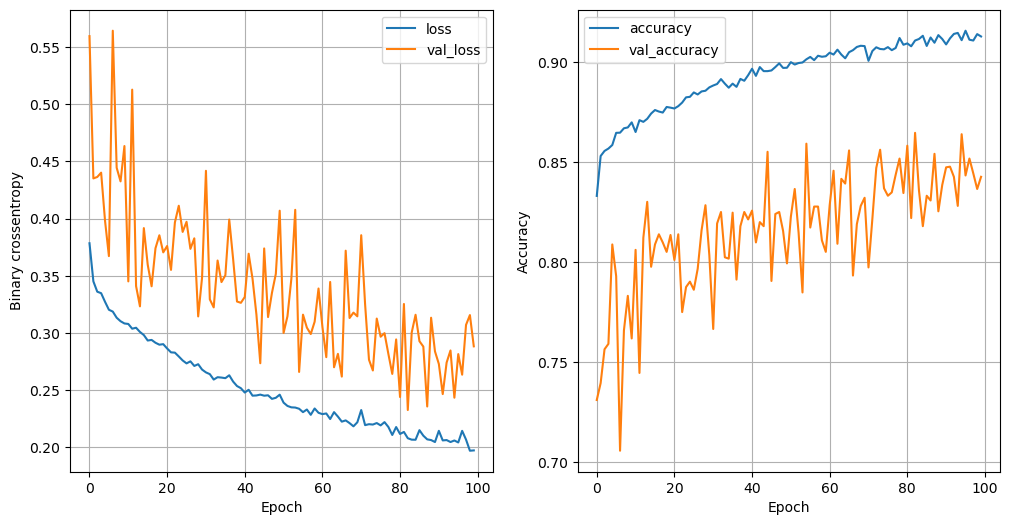

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 388us/step - accuracy: 0.8540 - loss: 0.6643
64nodes, dropout 0, learning rate 0.01,batchbatch_size 64


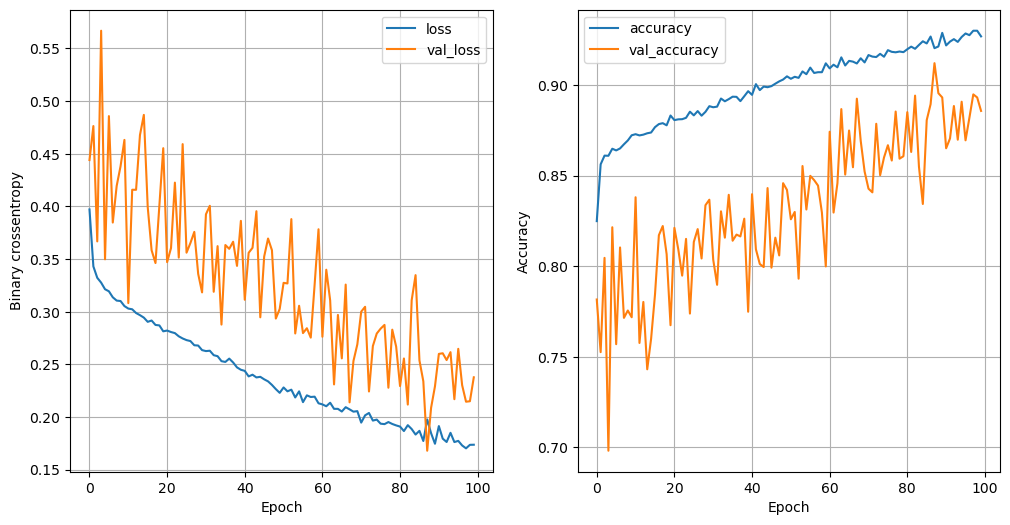

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8601 - loss: 0.5594
64nodes, dropout 0, learning rate 0.01,batchbatch_size 128


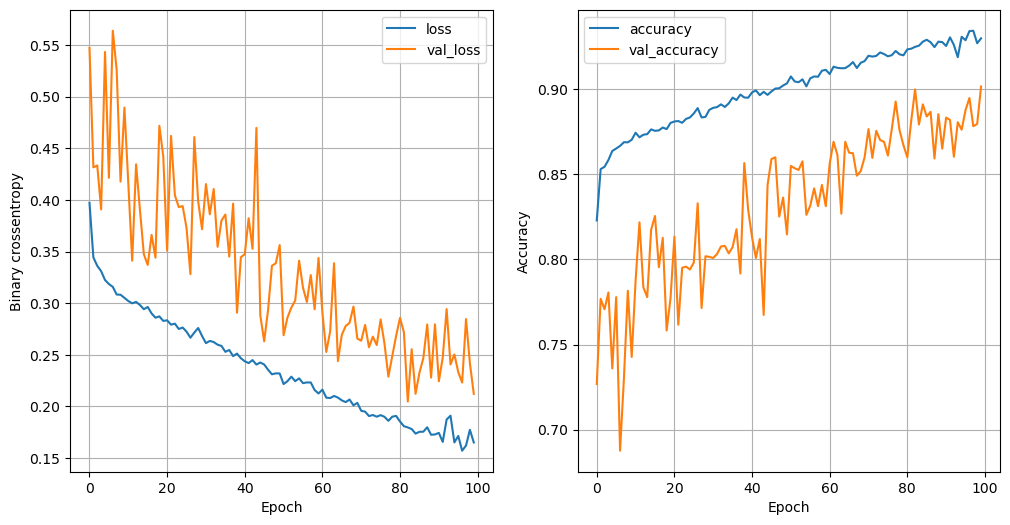

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 381us/step - accuracy: 0.8490 - loss: 0.5851
64nodes, dropout 0, learning rate 0.005,batchbatch_size 32


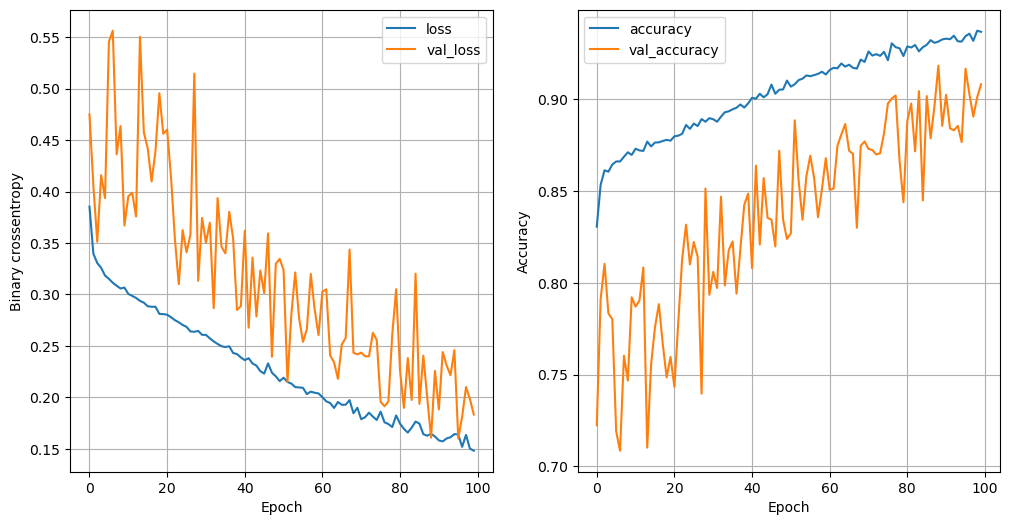

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8471 - loss: 0.7045
64nodes, dropout 0, learning rate 0.005,batchbatch_size 64


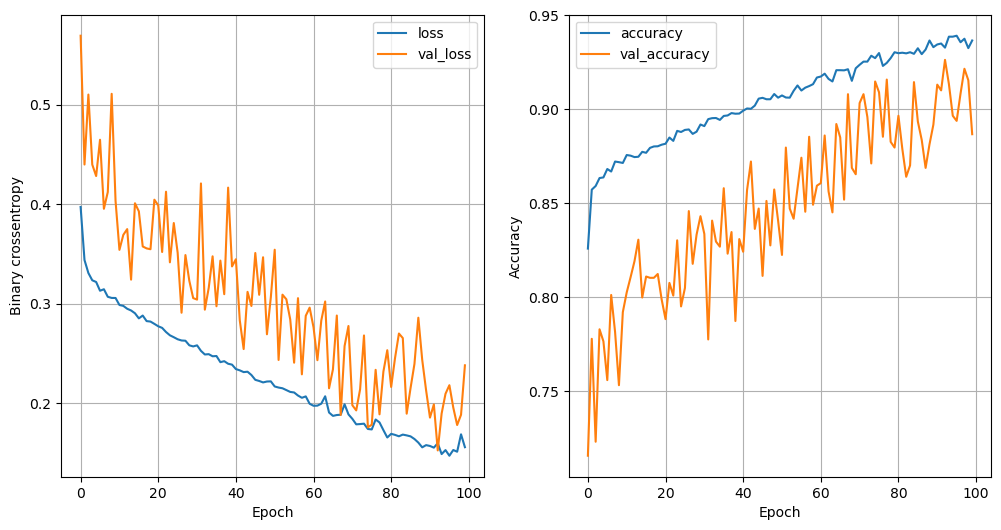

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8482 - loss: 0.5853
64nodes, dropout 0, learning rate 0.005,batchbatch_size 128


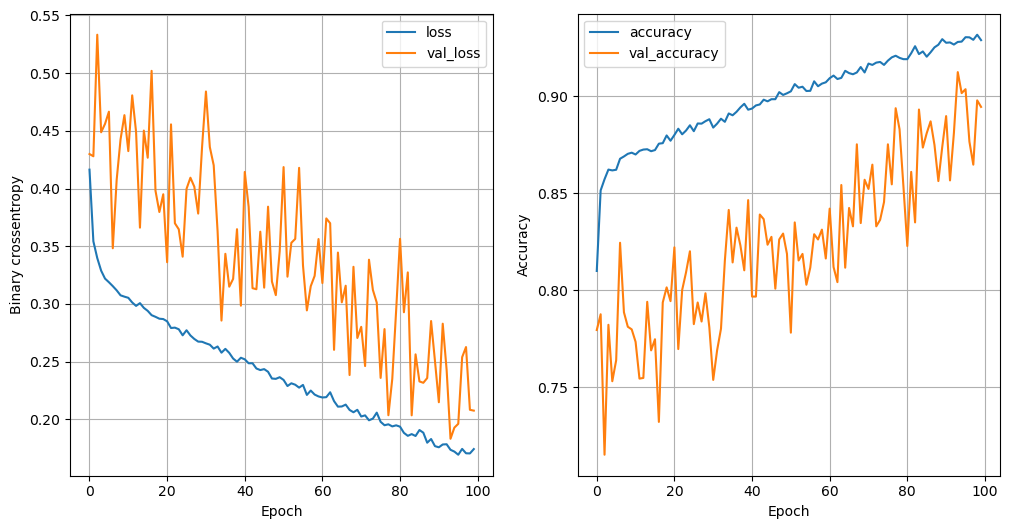

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 387us/step - accuracy: 0.8428 - loss: 0.5419
64nodes, dropout 0, learning rate 0.001,batchbatch_size 32


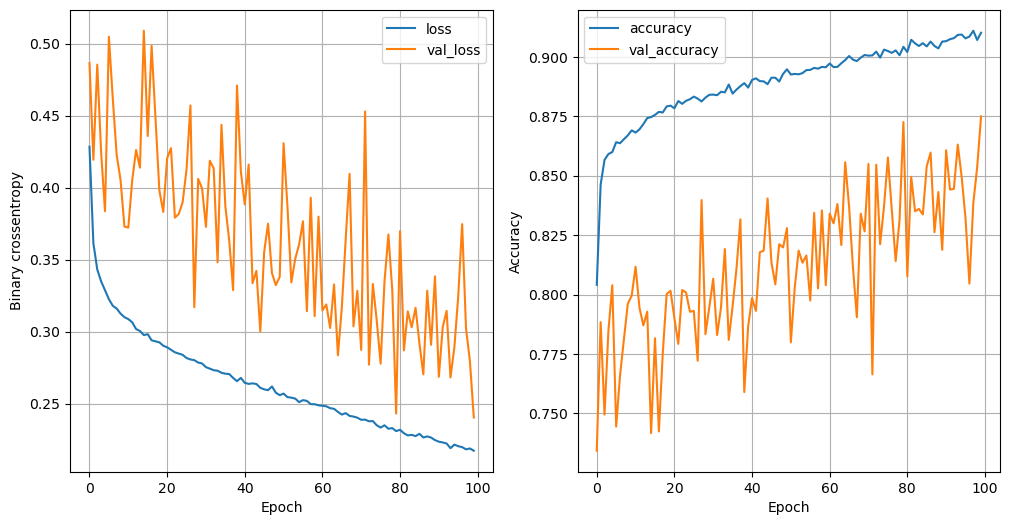

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.8496 - loss: 0.4093
64nodes, dropout 0, learning rate 0.001,batchbatch_size 64


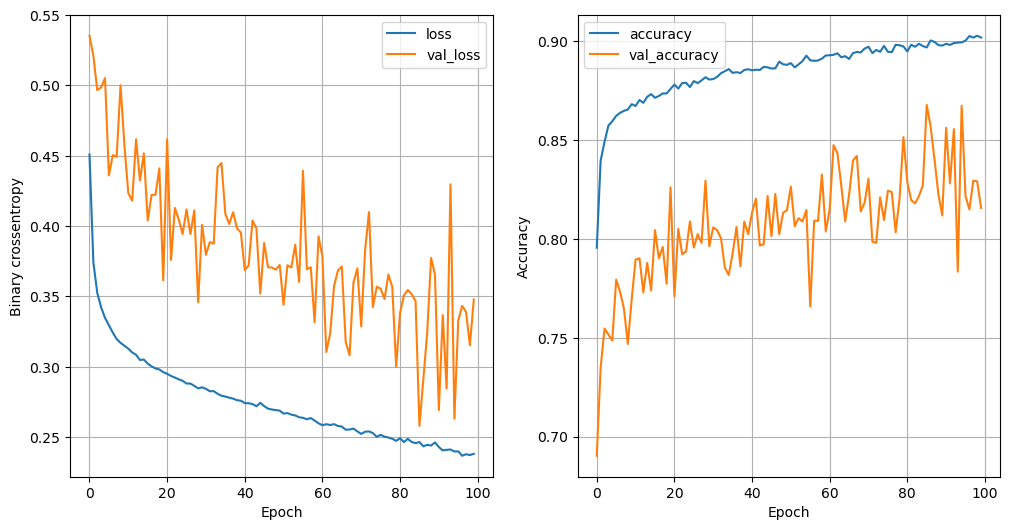

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step - accuracy: 0.8650 - loss: 0.3506
64nodes, dropout 0, learning rate 0.001,batchbatch_size 128


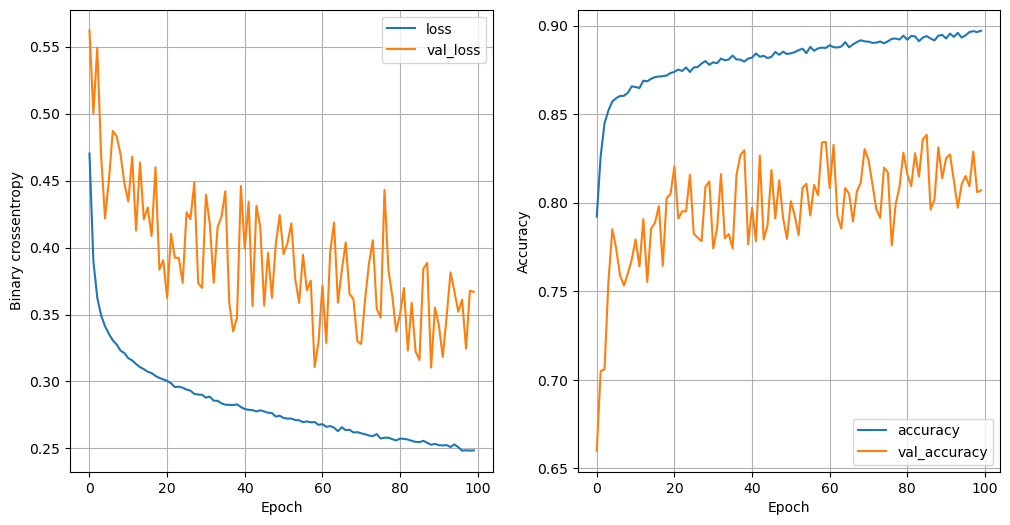

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 392us/step - accuracy: 0.8635 - loss: 0.3491
64nodes, dropout 0.2, learning rate 0.01,batchbatch_size 32


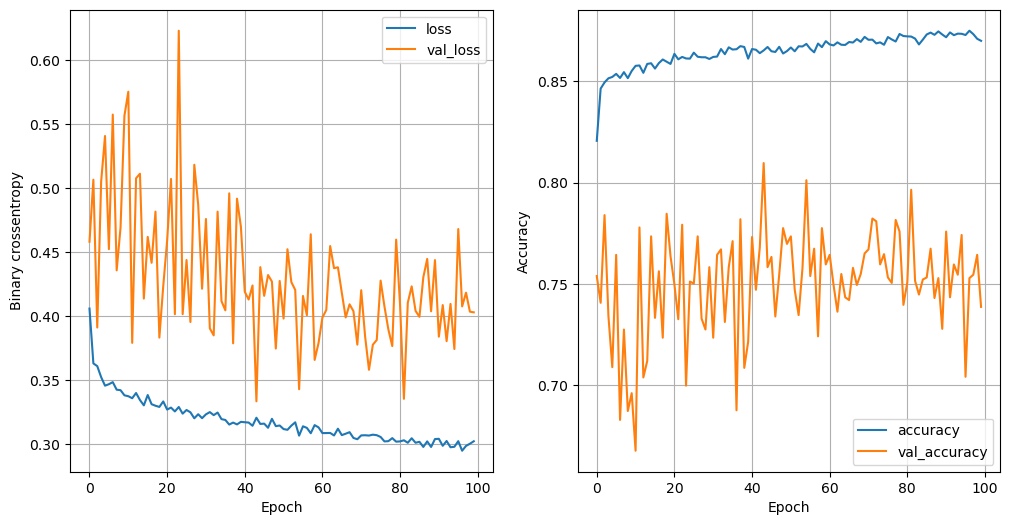

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 401us/step - accuracy: 0.8641 - loss: 0.3447
64nodes, dropout 0.2, learning rate 0.01,batchbatch_size 64


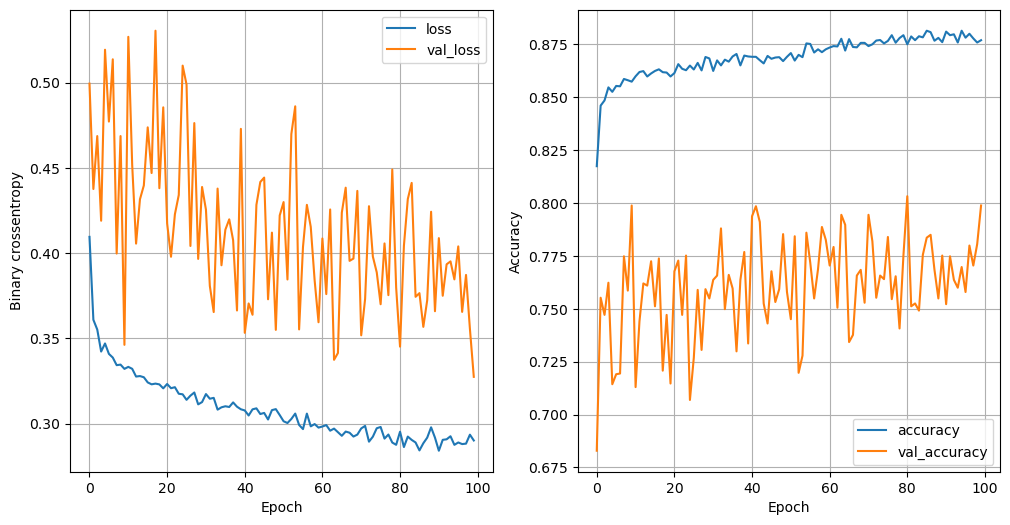

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 383us/step - accuracy: 0.8554 - loss: 0.3437
64nodes, dropout 0.2, learning rate 0.01,batchbatch_size 128


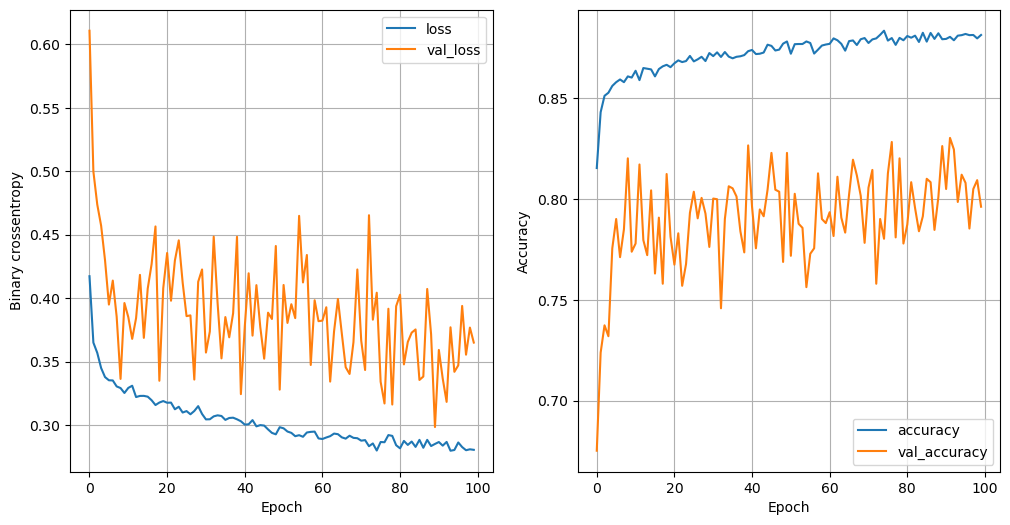

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.8605 - loss: 0.3315
64nodes, dropout 0.2, learning rate 0.005,batchbatch_size 32


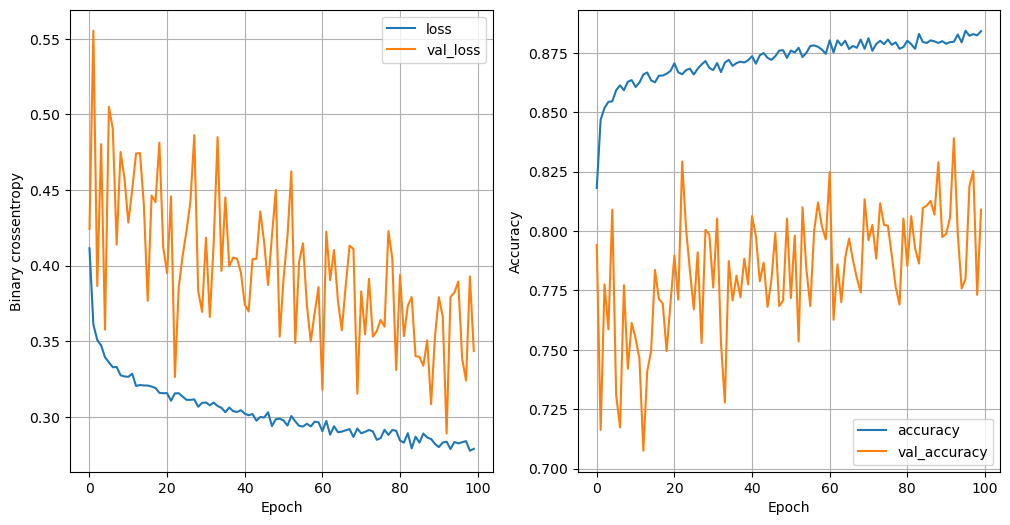

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 384us/step - accuracy: 0.8678 - loss: 0.3346
64nodes, dropout 0.2, learning rate 0.005,batchbatch_size 64


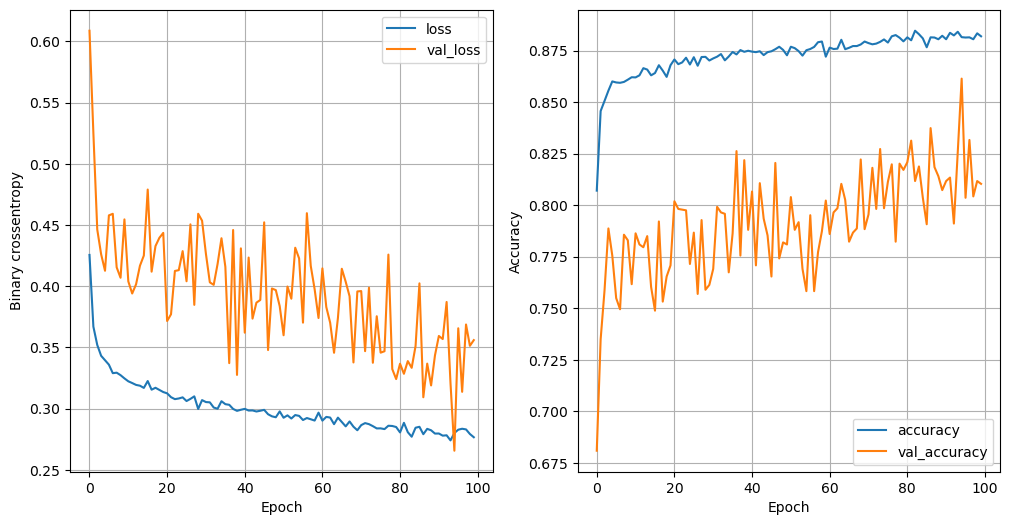

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.8643 - loss: 0.3225
64nodes, dropout 0.2, learning rate 0.005,batchbatch_size 128


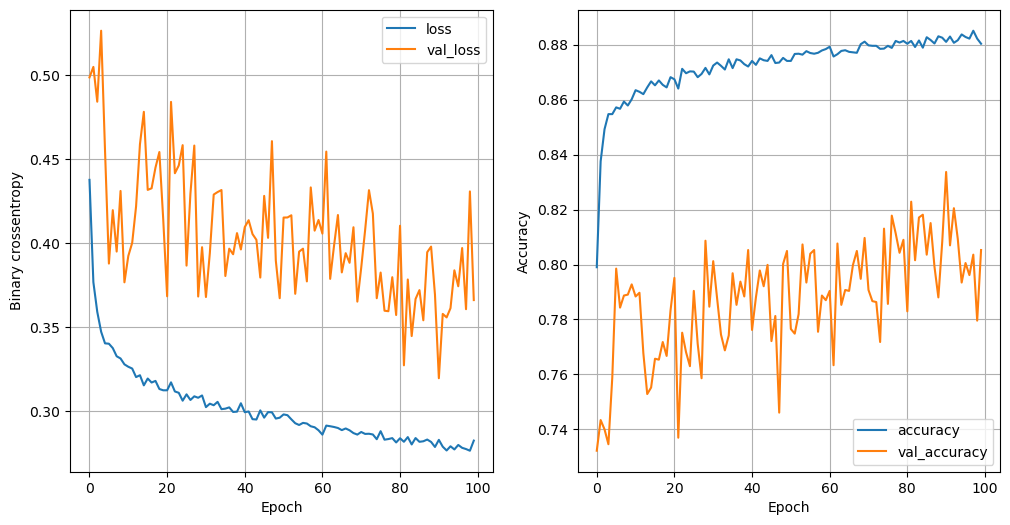

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 399us/step - accuracy: 0.8641 - loss: 0.3256
64nodes, dropout 0.2, learning rate 0.001,batchbatch_size 32


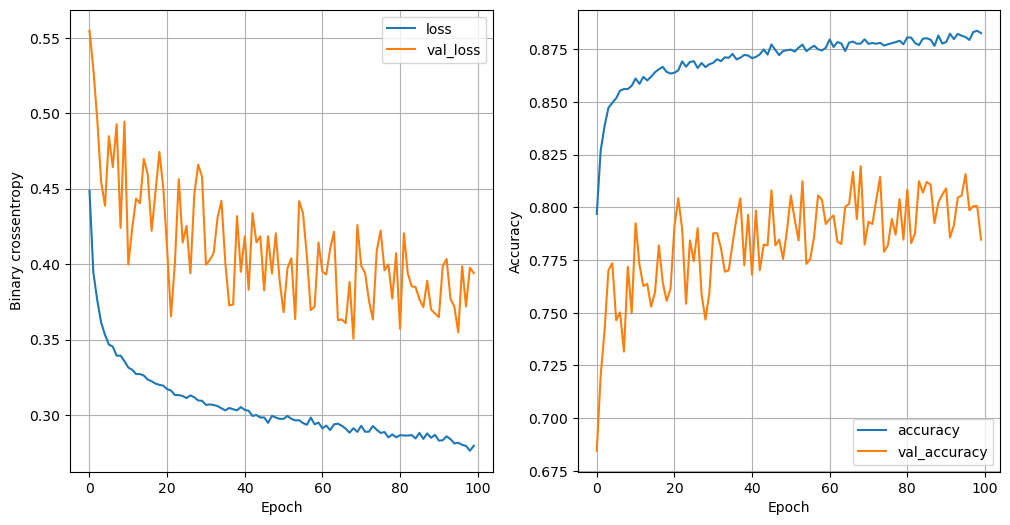

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.8626 - loss: 0.3179
64nodes, dropout 0.2, learning rate 0.001,batchbatch_size 64


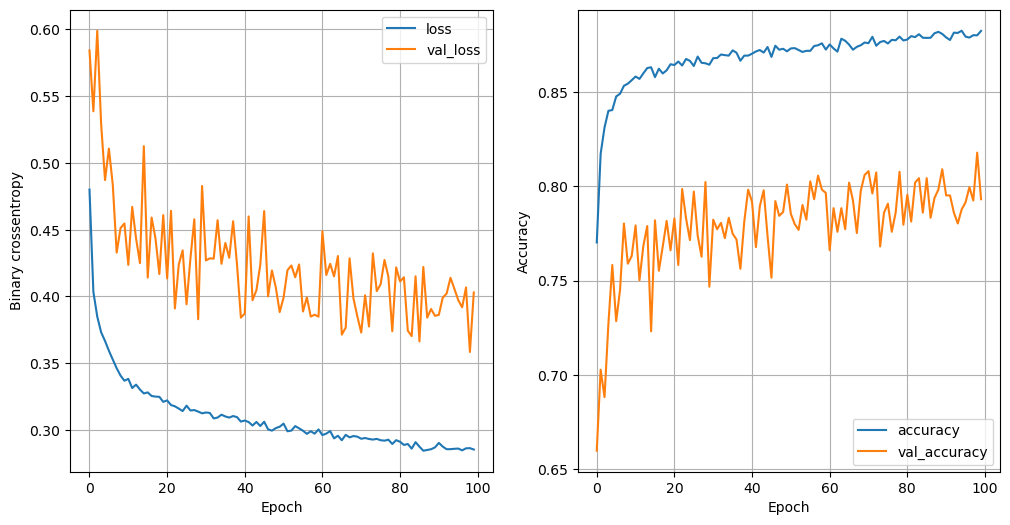

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 382us/step - accuracy: 0.8669 - loss: 0.3131
64nodes, dropout 0.2, learning rate 0.001,batchbatch_size 128


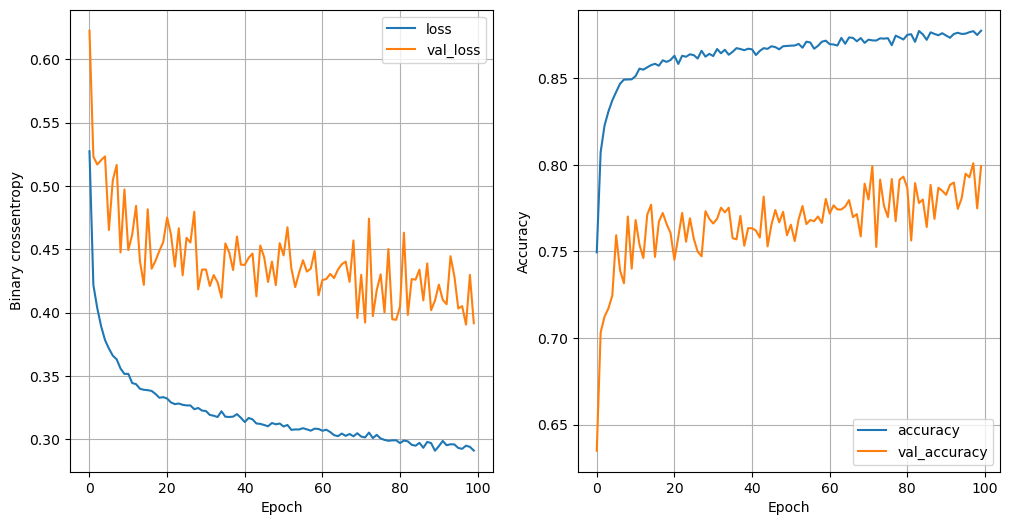

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 398us/step - accuracy: 0.8649 - loss: 0.3225


In [44]:
least_val_loss = float('inf')
least_loss_model = None
epochs = 100
for num_nodes in [64 #32,16]:
    for dropout_prob in [0,0.2]:
        for lr in [0.01,0.005,0.001]:
            for batch_size in [32,64,128]:
                print(f"{num_nodes}nodes, dropout {dropout_prob}, learning rate {lr},batchbatch_size {batch_size}")
                model, history = train_model(X_train,y_train,num_nodes, dropout_prob,
                                             lr,batch_size, epochs)
                plot_history(history)
                val_loss = model.evaluate(X_valid, y_valid)[0]
                if val_loss < least_val_loss:
                    least_val_loss = val_loss
                    least_loss_model = model

In [49]:
y_pred = least_loss_model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int).reshape(-1,)

119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 460us/step


In [50]:
y_pred

array([1, 0, 1, ..., 1, 1, 0])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.76      0.82      1344
           1       0.88      0.95      0.91      2460

    accuracy                           0.88      3804
   macro avg       0.88      0.85      0.86      3804
weighted avg       0.88      0.88      0.88      3804



## Regressão Linear

$y = b_0+b_1x$

$ŷ$ : the prediction

Ressidual(error) = $|y_n - ŷ_n|$

Square residual = $|y_n - ŷ_n|^2$

**Assumptions**

- Linearity :  data follow a linear pattern
- Independence : all single points should be independent
- Normality : (residual plot $|y_1-ŷ_1|$) residual should be normally distribution
- Homoskedasticity :(residual plot $|y_1-ŷ_1|$) a variance of points should remain constants

**There are:**

Simple Linear Regression : $y=b_0+b_1x$

Multiple linear regression: $y=b_0+b_1x_1+b_2x_2,...b_nx_n$

## Evaluating Linear Regression
### Mean Absolute Error (MAE)

Take errors, sum up all of them and divide for the total of points

$$\frac{\displaystyle\sum_{i=x}^n |y_i-ŷ_i|}{n}$$

### Mean Squared Error (MSE)

$$\frac{\displaystyle\sum_{i=x}^n (y_i-ŷ_i)^2}{n}$$

### Root Mean Squared Error (RMSE)

$$\sqrt{\frac{\displaystyle\sum_{i=x}^n (y_i-ŷ_i)^2}{n}}$$


### R²-Coefficient of Determination

$$R^2= 1- \frac{RSS}{TSS}$$

RSS = sum of the squared residuals
$$RSS=\displaystyle\sum_{i=x}^n (y_i-ŷ_i)^2$$

TSS = total sum of the squares
$$TSS=\displaystyle\sum_{i=x}^n(y_i-\overline{y})^2$$
$\overline{y}=$ mean of all the y values

$$R\to 1 \text{ (Good predictor) }$$ 